In [1]:
from utils.binaries import *
from utils.plotting import *
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

00:24:35 (   +2.6s) [INFO   ] -- import logging
00:24:35 (   +83ms) [INFO   ] -- import numpy as np
00:24:35 (   +11ms) [INFO   ] -- import uncertainties
00:24:35 (  +161ms) [INFO   ] -- import pandas as pd
00:24:35 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
00:24:35 (    +0ms) [INFO   ] -- import binaries.tools as tools
00:24:35 (  +240ms) [INFO   ] -- import matplotlib.pyplot as plt
00:24:35 (  +293ms) [INFO   ] -- import seaborn as so
00:24:35 (    +2ms) [INFO   ] -- set MONI_PATH = PosixPath('/home/filip/Data/monit_and_sd')
00:24:35 (    +0ms) [INFO   ] -- set HIST_PATH = PosixPath('/home/filip/Data/monit_and_sd')
00:24:35 (    +1ms) [INFO   ] -- set PLOT_PATH = PosixPath('/home/filip/Data/plots')
00:24:35 (    +0ms) [INFO   ] -- set DATA_PATH = PosixPath('/home/filip/Data')
00:24:35 (    +0ms) [INFO   ] -- set SCAN_PATH = PosixPath('/home/filip/Public/xy-calibration')
00:24:35 (    +0ms) [INFO   ] -- set OFLN_PATH = PosixPath('/home/filip/Public/offline/in

In [ ]:
# Xpr, Ypr, Zpr = np.loadtxt("trajectory_proton.txt", unpack=True, usecols=[0, 1, 2])
# Xfe, Yfe, ZFe = np.loadtxt("trajectory_iron.txt", unpack=True, usecols=[1, 2, 3])
Xph, Yph, Zph = np.loadtxt("trajectory_photon.txt", unpack=True, usecols=[0, 1, 2])

In [ ]:
plt.rcParams["figure.facecolor"] = 'k'
fig = plt.figure()
gs = GridSpec(
    2, 2,
    fig,
    
)

ax1 = fig.add_subplot(gs[:, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 1])

# XY projection
ax1.imshow(mpimg.imread("milky_way_XY.jpg"),
          extent=np.array([-13.5, 13.5, -13.5, 13.5]) * 1.45)
# ax1.plot(-8.2-YprHE, -8.5-XprHE, marker='none', c='b', lw=0.3, ls='-')

ax1.plot([], [], c='w', ls='-', label='Proton', marker='none')

ax1.plot(Xph, Yph, marker='none', c='w', lw=0.3, ls='--')
for e, c, skip, marker in zip(range(16, 20), plot.gradient(plt.cm.Wistia, 4), [10, 1, 1, 1], ['o', 's', 'v', '^']):
    if e == 18: ax1.plot([], [], c='w', ls='--', label='Photon', marker='none')

    Xpr, Ypr, Zpr = np.loadtxt(f"trajectory_proton_lgE{e}.txt", unpack=True, usecols=[1, 2, 3])
    ax1.plot(Xpr[::skip], Ypr[::skip], c=c, ls='-', lw=0.4, marker='none', alpha=0.9)
    ax1.plot([], [], c=c, label=f"$E\,=\,10^{{{e}}}$ eV", ls='-', marker=marker)
    ax1.scatter(Xpr[-1], Ypr[-1], marker=marker, c=c, s=1)


# ax1.plot([], [], c='b', ls='-', label='Iron     $E\,=\,10^{18}$ eV', marker='none')
# ax1.plot([], [], c='r', ls='-', label='Proton $\,E\,=\,10^{18}$ eV', marker='none')
# ax1.plot([], [], c='w', ls='--', label='Photon $E\,=\,10^{18}$ eV', marker='none')


ax1.legend(labelcolor='linecolor', ncol=2)
ax1.set_facecolor('k')
ax1.set_aspect('equal')
ax1.axis('off')

plt.subplots_adjust(hspace=0, wspace=0)


00:32:55 (  +31.4s) [DEBUG  ] -- font size set to 9.5
00:32:55 (    +1ms) [DEBUG  ] -- label size set to 13.0
00:32:55 (    +0ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
00:32:55 (    +1ms) [DEBUG  ] -- markersize set to 2.0
00:32:55 (    +0ms) [DEBUG  ] -- usetex set to False
/tmp/ipykernel_58138/1519054125.py:26: RuntimeWarning: invalid value encountered in divide
  ballistic_fraction = distance_from_source / traveled_distance


Text(0.5, 0, 'propagation time / years')

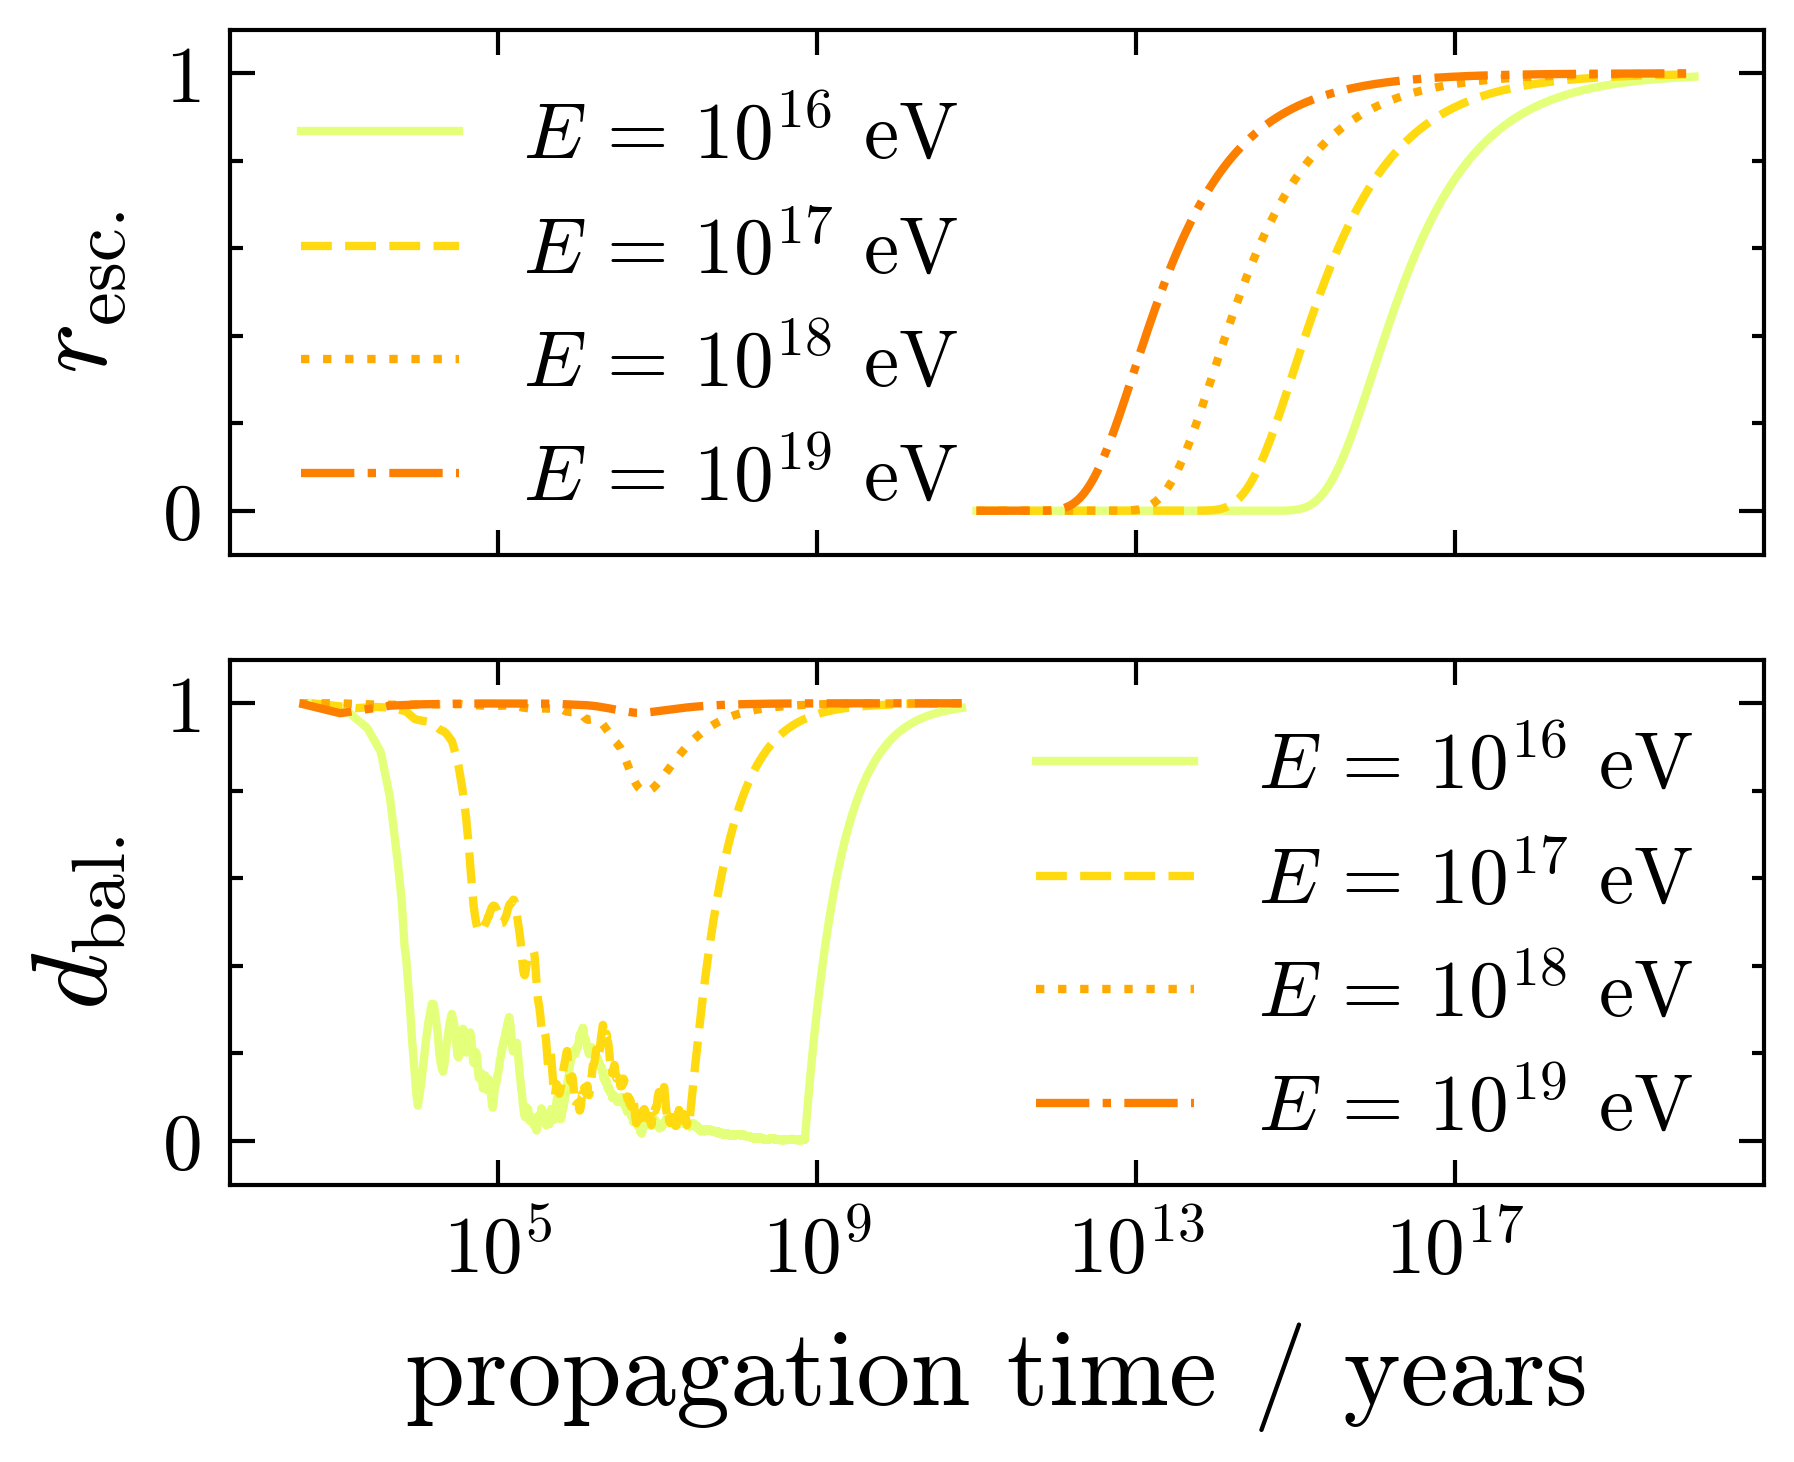

In [5]:
from scipy.special import erf

set_plt_style('double')

mp = 938.27e6           # eV
lm = 3e-15              # pc²/s

energies = [1e16, 1e17, 1e18, 1e19]
colors = plot.gradient(plt.cm.Wistia, 4)
t = np.geomspace(1e11, 1e20, 10000)

plt.rcParams["figure.facecolor"] = 'w'
fig, (ax3, ax4) = plt.subplots(2, 1, sharex=True)

for i, (energy, color) in enumerate(zip(energies, colors)):

    e = int(np.log10(energy))
    sigma = np.sqrt(2/3 * energy/mp * lm * t)
    r_t = 1 - erf(10e3 / sigma)

    Xpr, Ypr, Zpr = np.loadtxt(f"trajectory_proton_lgE{e}.txt", unpack=True, usecols=[1, 2, 3])
    diffX, diffY, diffZ = np.diff(Xpr),np.diff(Ypr), np.diff(Zpr)
    traveled_distance = np.cumsum(np.sqrt(diffX**2 + diffY**2 + diffZ**2))
    traveled_time = (traveled_distance * 3.26156)
    distance_from_source = np.sqrt((Xpr[0] - Xpr[1:])**2 + (Ypr[0] - Ypr[1:])**2 + (Zpr[0] - Zpr[1:])**2)
    ballistic_fraction = distance_from_source / traveled_distance
    ax4.plot(traveled_time * 1e5, ballistic_fraction, lw = 1, label=f"$E\,=\,10^{{{e}}}$ eV", c = color, marker='none')
    ax3.plot(t, r_t, lw = 1, label=f"$E\,=\,10^{{{e}}}$ eV", c = color, marker='none')

ax3.legend()
ax4.legend()
ax4.set_ylim(-0.1, 1.1)
ax3.set_ylim(-0.1, 1.1)
ax3.set_xscale('log')

ax3.set_ylabel("$r_\mathrm{esc.}$")
ax4.set_ylabel("$d_\mathrm{bal.}$")
ax3.set_yticks([0, 1])
ax4.set_yticks([0, 1])

ax4.set_xlabel("propagation time / years")


